# Training Mnist dataset for practising purpose

##### Importing the dataset

In [1]:
from tensorflow.keras.datasets import mnist

##### Checking if the dataset is already downloaded and saved using pickle 

##### Importing pickle to store the train and test datasets 

In [2]:
import pickle

##### Method to download and store the dataset

In [3]:
def downloadDataset():
    
    global x_train
    global x_test
    global y_train
    global y_test
    
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    with open("x_train", "wb") as f:
        pickle.dump(x_train, f)

    with open("x_test", "wb") as f:
        pickle.dump(x_test, f)

    with open("y_train", "wb") as f:
        pickle.dump(y_train, f)

    with open("y_test", "wb") as f:
        pickle.dump(y_test, f)

##### Method to load the downloaded data

In [4]:
def loadDataset():
    
    global x_train
    global x_test
    global y_train
    global y_test
    
    with open("x_train", "rb") as f:
        
        x_train = pickle.load(f)
        
    with open("x_test", "rb") as f:
        
        x_test = pickle.load(f)    
    
    with open("y_train", "rb") as f:
        
        y_train = pickle.load(f)
    
    with open("y_test", "rb") as f:
        
        y_test = pickle.load(f)

##### Importing the dataset 

In [5]:
import os


if (os.path.exists('x_train')):
    
    print ("Dataset found. Loading the dataset into objects")
    loadDataset()
    
else:
    
    print ("Dataset not found. Downloading the dataset")
    downloadDataset()
    

Dataset found. Loading the dataset into objects


### Displaying sample Image from the dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
rand_14 = np.random.randint(0, x_train.shape[0], 14)

In [8]:
sample_digits = x_train[rand_14]

sample_labels = y_train[rand_14]

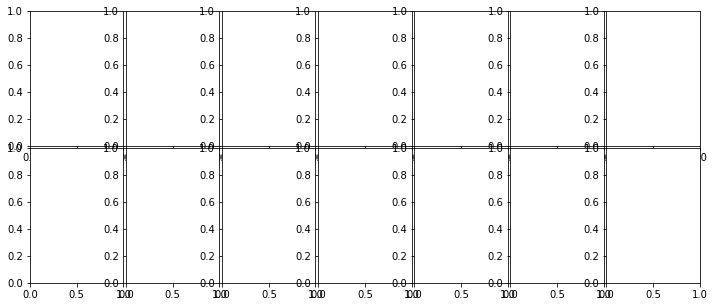

In [9]:
rows, cols = 2 , 7 
f, ax = plt.subplots(rows, cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
squeeze=True)

In [10]:
for r in range(rows):
    
    for c in range(cols):
        
        image_index = r * 7 + c
        
        ax[r,c].axis("off")
        ax[r,c].imshow(x_train[image_index], cmap="gray")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        
plt.show()


### Finding the height and width of the image 

In [11]:
image_height = x_train.shape[1]

image_width = x_train.shape[2]

In [12]:
print (image_height)

print (image_width)

num_channels = 1

28
28


In [13]:
print (x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### Reshaping the image for channels

In [14]:
train_data = np.reshape(x_train, (x_train.shape[0], image_height, image_width, num_channels))


test_data = np.reshape(x_test, (x_test.shape[0], image_height, image_width, num_channels))

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
train_data.shape

(60000, 28, 28, 1)

### Rescalling the image 

In [17]:
train_data = train_data.astype('float32')/255.

test_data = test_data.astype('float32')/255.

### One-hot encoding the labels 

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
num_classes = 10

In [20]:
train_labels = to_categorical(y_train, num_classes)

test_labels = to_categorical(y_test, num_classes)

In [21]:
print (train_labels)

print (test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
train_labels.shape

(60000, 10)

### Splitting the 10% of training dataset for evaluation purpose 

##### Shuffing the data 

In [23]:
for _ in range(5):
    
    indexes = np.random.permutation(len(train_data))

In [24]:
train_data = train_data[indexes]

train_labels = train_labels[indexes]

##### Splitting the data 

In [25]:
val_prec = 0.10

val_count = int(val_prec * len(train_data))

In [26]:
val_data = train_data[:val_count,:]

val_label = train_labels[:val_count,:]

In [27]:
train_data2 = train_data[val_count:, :]

train_label2 = train_labels[val_count:, :]

### Building our CNN model 

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [30]:
def build_model():
    
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size= (3,3),
                 activation='relu', padding='same',
                input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                padding='same'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                padding='same'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [31]:
model = build_model()

In [32]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
__________

In [33]:
results = model.fit(train_data2, train_label2, epochs=15, batch_size=64,
                   validation_data=(val_data, val_label))

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 39s 721us/step - loss: 0.1968 - acc: 0.9395 - val_loss: 0.0662 - val_acc: 0.9795
Epoch 2/15
54000/54000 [==============================] - 41s 755us/step - loss: 0.0494 - acc: 0.9847 - val_loss: 0.0457 - val_acc: 0.9848
Epoch 3/15
54000/54000 [==============================] - 47s 874us/step - loss: 0.0356 - acc: 0.9892 - val_loss: 0.0408 - val_acc: 0.9860
Epoch 4/15
54000/54000 [==============================] - 50s 925us/step - loss: 0.0272 - acc: 0.9908 - val_loss: 0.0334 - val_acc: 0.9892
Epoch 5/15
54000/54000 [==============================] - 48s 889us/step - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0300 - val_acc: 0.9903
Epoch 6/15
54000/54000 [==============================] - 53s 975us/step - loss: 0.0188 - acc: 0.9938 - val_loss: 0.0316 - val_acc: 0.9898
Epoch 7/15
54000/54000 [==============================] - 53s 972us/step - loss: 0.0149 - acc: 0.9952 - val_loss: 0.0

In [36]:
print (results.history)

{'val_loss': [0.06617238785823186, 0.045721309181923665, 0.040838897123932835, 0.03342191426021358, 0.03004019657957057, 0.03158534253730128, 0.03374603696197543, 0.02856594854872674, 0.047087860325894626, 0.05084527555401049, 0.03229815224193347, 0.03607200256976163, 0.031997829025708295, 0.03695381631388348, 0.041159653733315885], 'val_acc': [0.9795000001589457, 0.9848333333333333, 0.9860000001589457, 0.9891666666666666, 0.9903333333333333, 0.9898333334922791, 0.9900000001589457, 0.9908333333333333, 0.9895000001589457, 0.9873333333333333, 0.9925, 0.9915, 0.9918333333333333, 0.9916666666666667, 0.9913333333333333], 'loss': [0.19677016062675803, 0.049352519381377434, 0.03557267086407929, 0.02721507792412821, 0.020961349041313276, 0.018769273590995, 0.01491485972149746, 0.013022880224935727, 0.010029511222725785, 0.010024980722624739, 0.009540916838466796, 0.007105177498674527, 0.00835291751262789, 0.006438410537503606, 0.0064653131368973445], 'acc': [0.9395, 0.9847222222398828, 0.98920

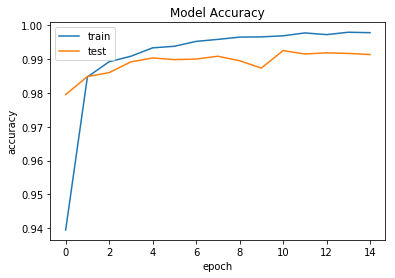

In [40]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

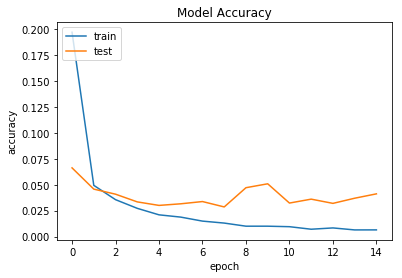

In [42]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels, batch_size=64)

print ('test loss: %.4f accuracy: %.4f' %(test_loss, test_accuracy))

10000/10000 [==============================] - 2s 182us/step
test loss: 0.0329 accuracy: 0.9932


### Results:
    
    Accuracy: 0.9932
        Loss: 0.0329

### Predictions 

In [47]:
predictions = model.predict(test_data)


first_20_preds = np.argmax(predictions, axis=1)[:25]

first_20_true = np.argmax(test_labels, axis=1)[:25]

In [49]:
print (first_20_preds)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


In [51]:
print (first_20_true)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


In [52]:
print (np.argmax(predictions, axis=1) != np.argmax(test_labels, axis=1).sum())

[ True  True  True ...  True  True  True]
